<a href="https://colab.research.google.com/github/BalaMuruga-14/fake-news-detection-Balamurugan/blob/main/fake_news_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Saving True.csv to True.csv
Saving Fake.csv to Fake.csv
Fake News Shape: (23481, 4)
True News Shape: (21417, 4)


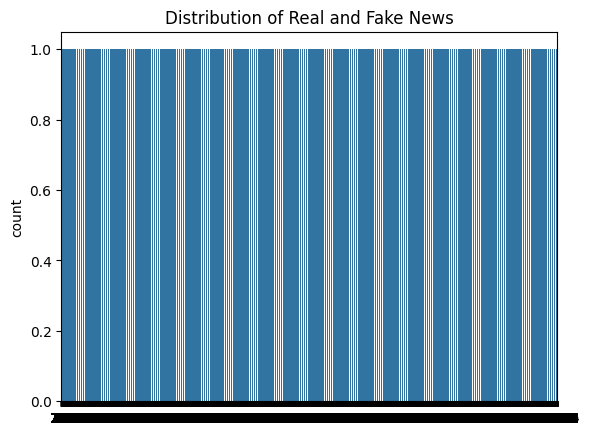

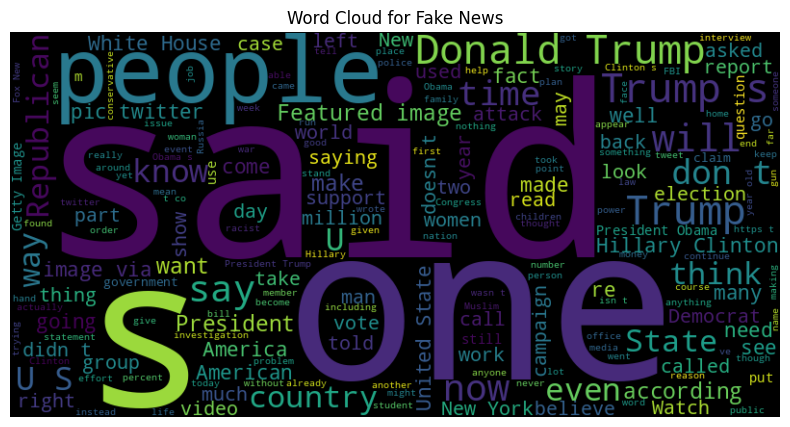

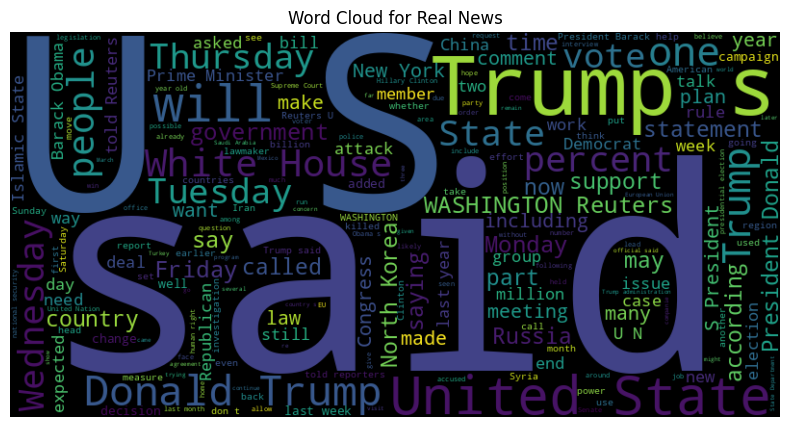

Logistic Regression Accuracy: 0.9855233853006682
Random Forest Accuracy: 0.9979955456570155
Naive Bayes Accuracy: 0.9351893095768374

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4800
           1       0.98      0.99      0.98      4180

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



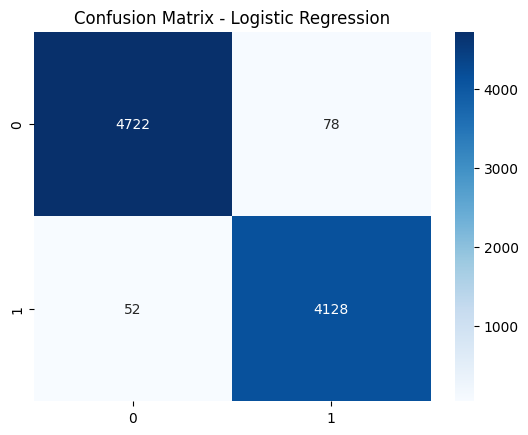


Model and vectorizer saved!


In [ ]:
# -------------------------------------------
# FAKE NEWS DETECTION PROJECT (Google Colab Ready)
# -------------------------------------------

# Step 1: Install and Import Libraries
!pip install nltk wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pickle

nltk.download('stopwords')
nltk.download('wordnet')

# Step 2: Upload and Load the Dataset
from google.colab import files
uploaded = files.upload()

fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

print("Fake News Shape:", fake.shape)
print("True News Shape:", true.shape)

# Add labels
fake['label'] = 0
true['label'] = 1

# Combine the data
data = pd.concat([fake, true], axis=0)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

# Step 3: Preprocessing the Text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['clean_text'] = data['text'].apply(clean_text)

# Step 4: Exploratory Data Analysis (EDA)
sns.countplot(data['label'])
plt.title("Distribution of Real and Fake News")
plt.show()

fake_text = ' '.join(fake['text'])
wordcloud_fake = WordCloud(width=800, height=400).generate(fake_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Fake News')
plt.show()

real_text = ' '.join(true['text'])
wordcloud_real = WordCloud(width=800, height=400).generate(real_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_real, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Real News')
plt.show()

# Step 5: Train-Test Split
X = data['clean_text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 7: Model Building
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
y_pred_lr = lr.predict(X_test_vec)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
y_pred_rf = rf.predict(X_test_vec)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# Step 8: Evaluation
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Step 9: Save the Best Model
with open('fake_news_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("\nModel and vectorizer saved!")
